<a href="https://colab.research.google.com/github/Viviankatheu/Autolib-Car-Sharing-Service---Hypothesis-Testing/blob/main/Week_4_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Electric Car sharing Project

##1. Defining the Question

### a) Specifying the data analytic question

To investigate a claim about the blue cars

Null Hypothesis: The average number of blue cars taken from 75015 is not different from the number of blue cars taken from 75016

Alternative Hypothesis: The average number of blue cars taken from 75015 is different from the number of blue cars taken from 75016


### b)Defining the Metric for success

To find out if there is enough evidence to show that the claim is true, given the null hypothesis is true

### c)Understanding the context

I will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. I am going to test the claim that the number of blue cars taken is different from the number of blue cars returned.

### d)Recording the experimental design

1. To define the null and alternative hypothesis

2. Find and deal with outliers and other anomalies such as missing data and duplicates

3. Perform exploratory data analysis on the dataset. I will do both univariate and bivariate analysis.

4. Perform hypothesis testing

5. Challenge the solution

### e)Data Relevance


Postal code - postal code of the area (in Paris)

Date  - date of the row aggregation

n_daily_data_points - number of daily data poinst that were available for aggregation, that day

dayOfWeek - identifier of weekday (0: Monday -> 6: Sunday)

day_type - weekday or weekend

BlueCars_taken_sum - Number of bluecars taken that date in that area

BlueCars_returned_sum - Number of bluecars returned that date in that area

Utilib_taken_sum - Number of Utilib taken that date in that area

Utilib_returned_sum - Number of Utilib returned that date in that area

Utilib_14_taken_sum - Number of Utilib 1.4 taken that date in that area

Utilib_14_returned_sum - Number of Utilib 1.4 returned that date in that area

Slots_freed_sum - Number of recharging slots released that date in that area

Slots_taken_sum  -Number of rechargign slots taken that date in that area

## 2. Reading the Data from the CSV file

### a) Importing our libraries

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### b) Loading the data

In [2]:
#Loading the data from the data source
# Dataset : http://bit.ly/DSCoreAutolibDataset

autolib_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset', index_col=False)
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## 3. Checking the data

In [3]:
#Determining the no. of records in our dataset

autolib_df.shape

(16085, 13)

In [4]:
#Checking the top of the dataset

autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
#Checking the bottom of the dataset
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [6]:
#Checking a random sample of the dataset
autolib_df.sample(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
6109,92210,1/29/2018,1440,0,weekday,92,93,3,3,4,4,0,0
6610,92240,3/6/2018,1439,1,weekday,80,94,1,1,5,7,0,0
14857,94410,1/20/2018,1439,5,weekend,39,38,3,3,2,1,0,0
9334,92420,6/11/2018,1440,0,weekday,11,12,0,1,0,0,0,0
12322,93440,5/30/2018,1440,2,weekday,7,5,0,0,1,2,0,0
648,75005,1/25/2018,1398,3,weekday,265,267,12,14,16,18,105,105
14434,94230,3/9/2018,1440,4,weekday,44,42,0,1,4,5,0,0
15131,94450,6/2/2018,1440,5,weekend,19,14,0,1,0,0,0,0
12574,93600,3/20/2018,1440,1,weekday,8,11,0,0,1,2,0,0
14409,94230,2/9/2018,1439,4,weekday,37,34,1,2,3,5,0,0


In [7]:
#Accessing the information in our dataset
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
#Checking whether each column has an appropriate datatype
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## 4. External Data Source Validation

### a) Validation

This data was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). The dataset used was ranging from January to July of 2018 and is relevant for this analysis

## 5. Tidying the dataset

Let us perform data cleaning procedures below providing a documentation for our actions and reasons. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data.

In [9]:
#Accessing information about our dataset

autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [10]:
#Dropping unnecessary columns
#We won't need them in our analysis

autolib_df.drop(columns= ['Slots_freed_sum','Slots_taken_sum','n_daily_data_points',
                          'Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum'], axis =1, inplace=True )
autolib_df


,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117
...,...,...,...,...,...,...
16080,95880,6/15/2018,4,weekday,15,10
16081,95880,6/16/2018,5,weekend,19,19
16082,95880,6/17/2018,6,weekend,33,35
16083,95880,6/18/2018,0,weekday,11,14


In [11]:
autolib_df.columns

Index(['Postal code', 'date', 'dayOfWeek', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum'],
      dtype='object')

In [12]:
#Checking for missing values

autolib_df.isnull().sum()

Postal code              0
date                     0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dtype: int64

There are no missing values in our dataset

In [13]:
#Checking for duplicates

autolib_df.duplicated().any()

False

There are no duplicates in our dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


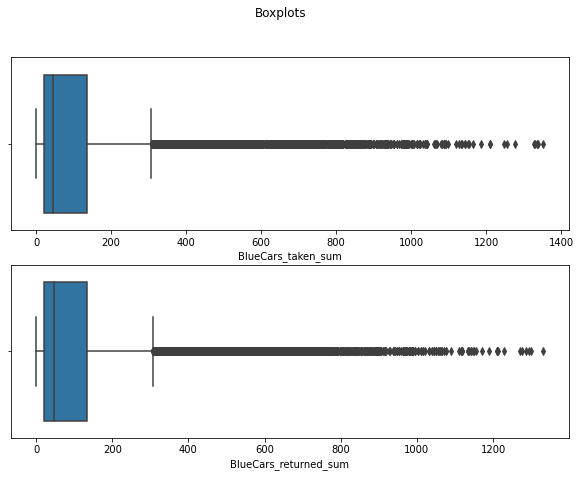

In [14]:
#Checking for outliers in the dataset

fig, ((ax1, ax2)) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib_df['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(autolib_df['BlueCars_returned_sum'], ax=ax2)
plt.show()


##6. Exploratory Data Analysis: Univariate Data Analysis

We shall use pandas profiling for the univariate data anlysis

In [ ]:
!pip install pandas==1.2.4

In [ ]:
 !pip install pandas-profiling==2.7.1

In [17]:
from pandas_profiling import ProfileReport

prof = ProfileReport(autolib_df)
prof.to_notebook_iframe()

#Creating a html file where you can see the profile report much easier
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
#autolib_df.BlueCars_taken_sum.value_counts().plot.bar()

autolib_df.groupby('Postal code')[['BlueCars_taken_sum']].sum().sort_values(by ='BlueCars_taken_sum', ascending= False)

,BlueCars_taken_sum
Postal code,
75015,139925
75016,123287
75017,114581
75013,84489
75019,81973
...,...
93150,794
94100,749
93370,558


Descriptive Stats

## 7. Exploratory Data Analysis: Bivariate Analysis

###a) Numerical and Numerical

#### Pair Plots

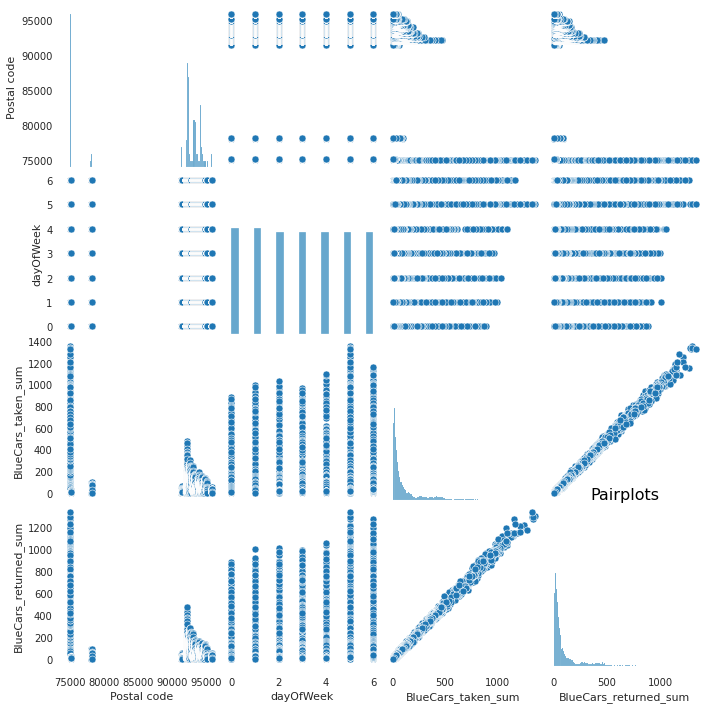

In [19]:
#Pair Plots

sns.pairplot(autolib_df)
plt.title('Pairplots', fontsize = 16, color = 'black')
plt.show()

#### Correlation

In [20]:
#Checking to see correlation

autolib_df.corr()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
Postal code,1.000000,0.000343,-0.698020,-0.697519
dayOfWeek,0.000343,1.000000,0.079649,0.081954
BlueCars_taken_sum,-0.698020,0.079649,1.000000,0.998660
BlueCars_returned_sum,-0.697519,0.081954,0.998660,1.000000


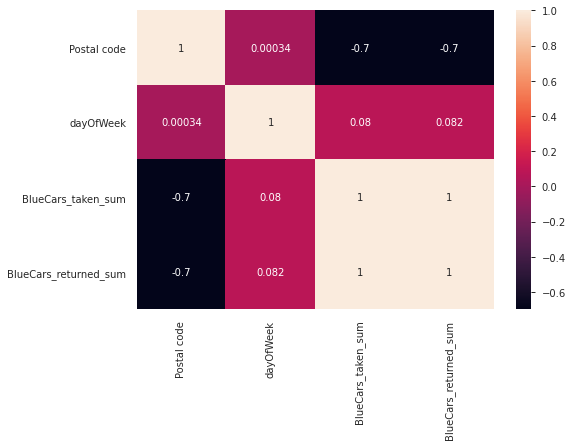

In [21]:
#Plotting a correlation matrix

sns.heatmap(autolib_df.corr(),annot=True)
plt.show()

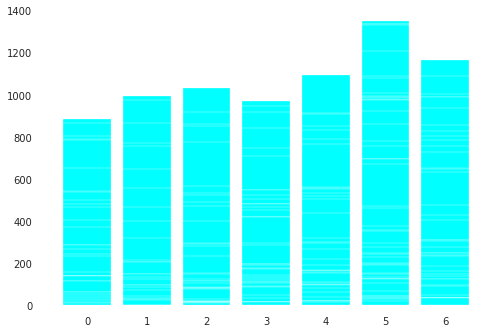

In [22]:
#plotting bar charts

plt.bar(autolib_df['dayOfWeek'],autolib_df['BlueCars_taken_sum'], color = 'cyan')
plt.show()

In [23]:
#Checking the data types
autolib_df.dtypes

Postal code               int64
date                     object
dayOfWeek                 int64
day_type                 object
BlueCars_taken_sum        int64
BlueCars_returned_sum     int64
dtype: object

In [24]:
autolib_df['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


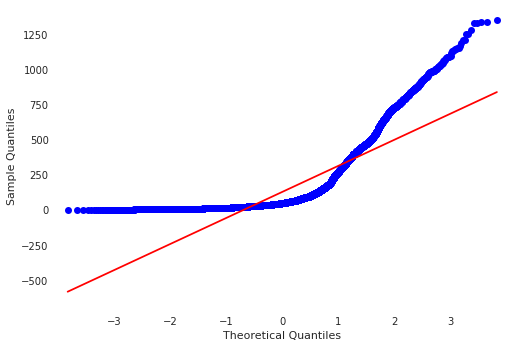

In [25]:
#Doing a normality test

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
data = autolib_df['BlueCars_taken_sum']
qqplot(data, line='s')
pyplot.show()

## 8. Hypothesis Testing

### a) Formulating a null and alternative hypothesis

In [26]:
#We will filter the data to only weekdays and pick postal code 75015 & 75016 coz they have the highest number of bluecars taken

autolib_df1 = autolib_df[autolib_df.day_type == 'weekday']
autolib_df1.head()

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


In [27]:
autolib_df2 = autolib_df1[autolib_df1['Postal code'] == 75015]
autolib_df2
pop15 = autolib_df2['BlueCars_taken_sum'].values
pop15

array([ 781,  710,  739,  669,  852,  694,  791,  826,  810,  881,  753,
        810,  885,  831,  950,  751,  718,  784,  871,  963,  721,  732,
        816,  880,  942,  808,  781,  625,  703,  794,  723,  723,  874,
        872,  943,  650,  751,  757,  765,  827,  723,  732,  897,  733,
        829,  805,  790,  907,  764,  766,  811,  818,  898,  746,  790,
        819,  813,  946,  734,  797,  884,  833,  867,  839,  756,  926,
        893,  875,  839,  887,  962,  955, 1005,  737,  774,  757,  712,
        936,  672,  697,  774,  819,  867,  877,  857,  865,  773,  944,
        840,  931,  810,  856,  614,  938, 1043,  861,  888,  985,  932,
       1089,  864,  994, 1032,  968, 1087,  885,  973,  920,  946, 1093,
        669,   49])

In [28]:
autolib_df3 = autolib_df1[autolib_df1['Postal code'] == 75016]
autolib_df3
pop16 = autolib_df3['BlueCars_taken_sum'].values
pop16

array([693, 536, 638, 586, 741, 668, 702, 768, 715, 835, 668, 786, 786,
       728, 908, 766, 721, 796, 747, 791, 650, 795, 781, 835, 884, 760,
       755, 630, 756, 721, 665, 709, 843, 867, 824, 583, 691, 748, 768,
       764, 719, 687, 772, 683, 808, 764, 756, 814, 666, 793, 830, 804,
       783, 741, 753, 783, 854, 780, 628, 728, 825, 799, 787, 737, 734,
       853, 817, 789, 826, 795, 774, 761, 850, 617, 686, 729, 606, 731,
       590, 637, 647, 655, 746, 659, 655, 742, 816, 801, 713, 758, 714,
       812, 640, 745, 912, 866, 862, 860, 917, 846, 802, 839, 837, 832,
       890, 742, 864, 850, 844, 909, 781,  36])

In [29]:
#Checking the shape of our data
pop15.shape

(112,)

In [30]:
pop16.shape

(112,)

Null Hypothesis (Ho): The average number of blue cars taken from postal code 75015 is not different from the number of blue cars taken from 75016

Alternative Hypothesis (Ha): The average number of blue cars taken from postal code 75015 is different from the number of blue cars taken from 75016

### b) Setting the confidence and significance levels

I shall use a confidence level of 95% and a correspondingsignificance level of 5%

### c) Calculating the test statistic and corresponding p value

In [31]:
# Performing Simple Random sampling
autolib_sample = autolib_df2.sample(n = 50, replace=False)
autolib_sample

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
2326,75015,6/6/2018,2,weekday,1032,1010
2276,75015,4/6/2018,4,weekday,875,840
2273,75015,4/3/2018,1,weekday,756,767
2219,75015,2/5/2018,0,weekday,808,807
2248,75015,3/9/2018,4,weekday,907,865
2234,75015,2/20/2018,1,weekday,751,728
2255,75015,3/16/2018,4,weekday,898,838
2215,75015,2/1/2018,3,weekday,880,837
2288,75015,4/18/2018,2,weekday,757,745
2191,75015,1/8/2018,0,weekday,694,728


In [32]:
#Let's look for the population and sample means
#Let's get the sample mean

autolib_sample['BlueCars_taken_sum'].mean()

824.3

In [33]:
#Let's calculate the population mean and standard deviation
pop16.mean()

752.5803571428571

In [34]:
pop16.std()

105.04443263897367

In [35]:
# Calculating the z statistic
import scipy.stats as stats
from scipy.stats import norm

zscore = (830.14 - 752.58)/ 105
print("Z score: ", zscore)
prob = stats.norm.cdf(zscore)
print('P Value: ', prob)

Z score:  0.7386666666666661
P Value:  0.769945284281768


### d) Drawing a conclusion

Since the p value(0.7699) is more than the level of significance(0.025) , we fail to reject the null hypothesis. There isn't enough evidence to show that the number of blue cars taken from postal code 75015 is different from the ones taken from 75016.